<a href="https://colab.research.google.com/github/mathdecastro/complex-survey-data-analysis-in-brazil/blob/main/Amostragem_Avan%C3%A7ada_PNADc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Carregando os pacotes e os dados**

In [ ]:
install.packages("PNADcIBGE")
library(PNADcIBGE)
library(survey)
library(tidyverse)

variaveis_selecionadas = c("UF","V2001","V2005","V2007","V2009",
                          "V2010","VD3004","VD4001","VD4002","VD4020",
                          "VD4035", "VD4003", "VD4005", "VD4004A")

dados_pnadc = get_pnadc(year = 2018,
                        quarter = 1,
                        vars = variaveis_selecionadas)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘minqa’, ‘numDeriv’, ‘mitools’, ‘Rcpp’, ‘RcppArmadillo’, ‘projmgr’, ‘RCurl’, ‘survey’, ‘timeDate’


Loading required package: grid

Loading required package: Matrix

Loading required package: survival


Attaching package: ‘survey’


The following object is masked from ‘package:graphics’:

    dotchart


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ tidyr::unpack() masks Matrix

##**Selecionando as variáveis e carregando os dados**

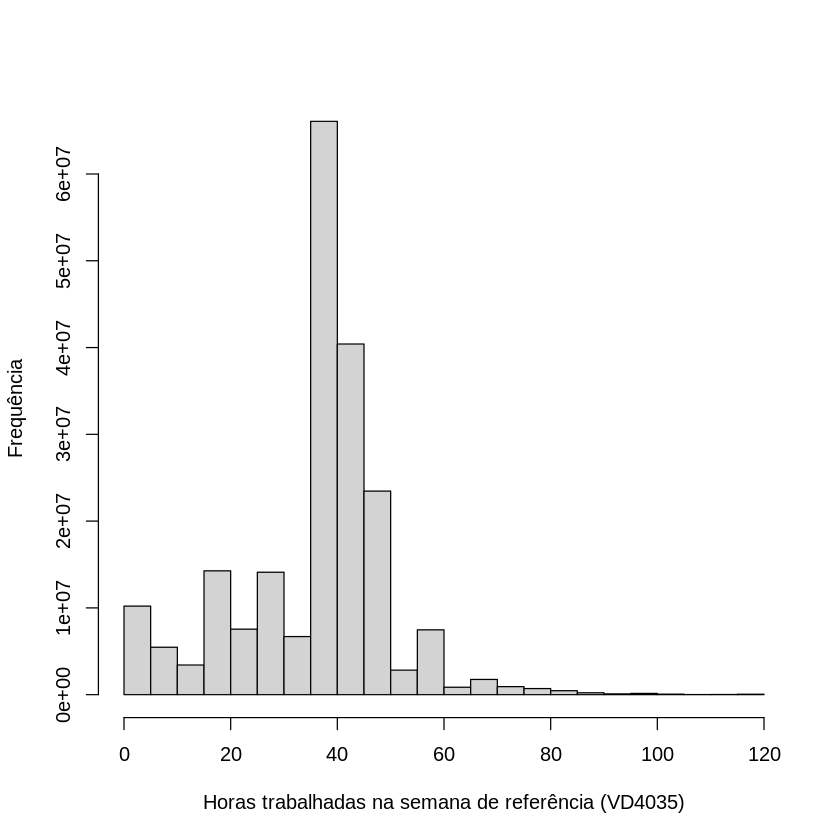

In [ ]:
svyhist(
  formula = ~as.numeric(VD4035),
  design = dados_pnadc,
  freq = TRUE,
  xlab = "Horas trabalhadas na semana de referência (VD4035)",
  ylab = "Frequência",
  main = ""
  )

In [ ]:
df = data.frame(svyby(formula=~(VD4002=="Pessoas desocupadas"),
 denominator=~(VD4001=="Pessoas na força de trabalho"),
 by=~UF,
 design=dados_pnadc,
 FUN=svyratio,
 vartype="cv",
 na.rm=TRUE
 ))

colnames(df) = c('UF', 'percentual', 'coefvar')

siglas_uf = c("RO", "AC", "AM", "RR", "PA", "AP", "TO", "MA", "PI", "CE", "RN", "PB", "PE", "AL", "SE", "BA", "MG", "ES", "RJ", "SP", "PR", "SC", "RS", "MS", "MT", "GO", "DF")
df$sigla_uf = siglas_uf

Warning message in Ops.factor("Pessoas desocupadas", VD4004A):
“‘+’ not meaningful for factors”


ERROR: Error in svrVar(repmeans, scale, rscales, mse = design$mse, coef = rval): All replicates contained NAs


In [ ]:
df

,UF,percentual,coefvar,NA,NA,sigla_uf
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Rondônia,Rondônia,0,1,NaN,0,RO
Acre,Acre,0,1,NaN,0,AC
Amazonas,Amazonas,0,1,NaN,0,AM
Roraima,Roraima,0,1,NaN,0,RR
Pará,Pará,0,1,NaN,0,PA
Amapá,Amapá,0,1,NaN,0,AP
Tocantins,Tocantins,0,1,NaN,0,TO
Maranhão,Maranhão,0,1,NaN,0,MA
Piauí,Piauí,0,1,NaN,0,PI


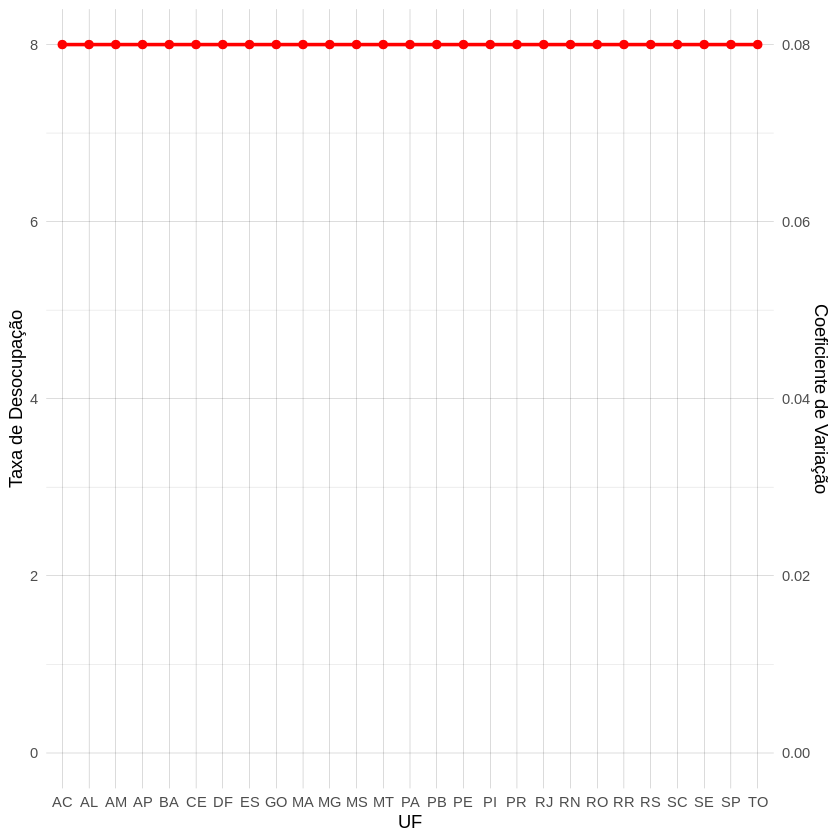

In [ ]:
ggplot(df, aes(x = sigla_uf)) +
  geom_bar(aes(y = percentual), stat = "identity", fill = "skyblue") +
  geom_line(aes(y = coefvar * 8, group = 1), color = "red", size = 1) +
  geom_point(aes(y = coefvar * 8), color = "red", size = 2) +
  scale_y_continuous(
    name = "Taxa de Desocupação",
    sec.axis = sec_axis(~./100, name = "Coeficiente de Variação")
  ) +
  labs(
    x = "UF"
  ) +
  theme_minimal() +
  theme(panel.grid.major = element_line(colour = "black", size = 0.04, linetype = 1))

In [ ]:
dados_pnadc$variables[!is.na(dados_pnadc$variables$VD4001), ] %>%
  select(UF, VD4001, V1028) %>%
  group_by(VD4001, UF) %>%
  summarize(QTDE = sum(V1028))

ERROR: Error in dados_pnadc$variables[!is.na(dados_pnadc$variables$VD4001), ] %>% : could not find function "%>%"


In [ ]:
df_total_uf = dados_pnadc$variables %>%
  select(V2007, UF, V1028) %>%
  group_by(UF) %>%
  summarize(QTDE = sum(V1028))

df_total_uf_sexo = dados_pnadc$variables %>%
  select(V2007, UF, V1028) %>%
  group_by(UF, V2007) %>%
  summarize(QTDE = sum(V1028))

df_total_uf_sexo_merged = merge(df_total_uf_sexo, df_total_uf, by = "UF") %>% mutate(percentual = QTDE.x/QTDE.y)

In [ ]:
df_total_uf_sexo_merged

UF,V2007,QTDE.x,QTDE.y,percentual
<fct>,<fct>,<dbl>,<dbl>,<dbl>
Acre,Homem,424585.5,848629,0.5003193
Acre,Mulher,424043.5,848629,0.4996807
Alagoas,Homem,1593820.0,3311077,0.4813600
Alagoas,Mulher,1717257.0,3311077,0.5186400
Amapá,Homem,405149.9,815210,0.4969884
Amapá,Mulher,410060.1,815210,0.5030116
Amazonas,Homem,1957947.9,3898488,0.5022326
Amazonas,Mulher,1940540.1,3898488,0.4977674
Bahia,Homem,7280628.3,14772847,0.4928385


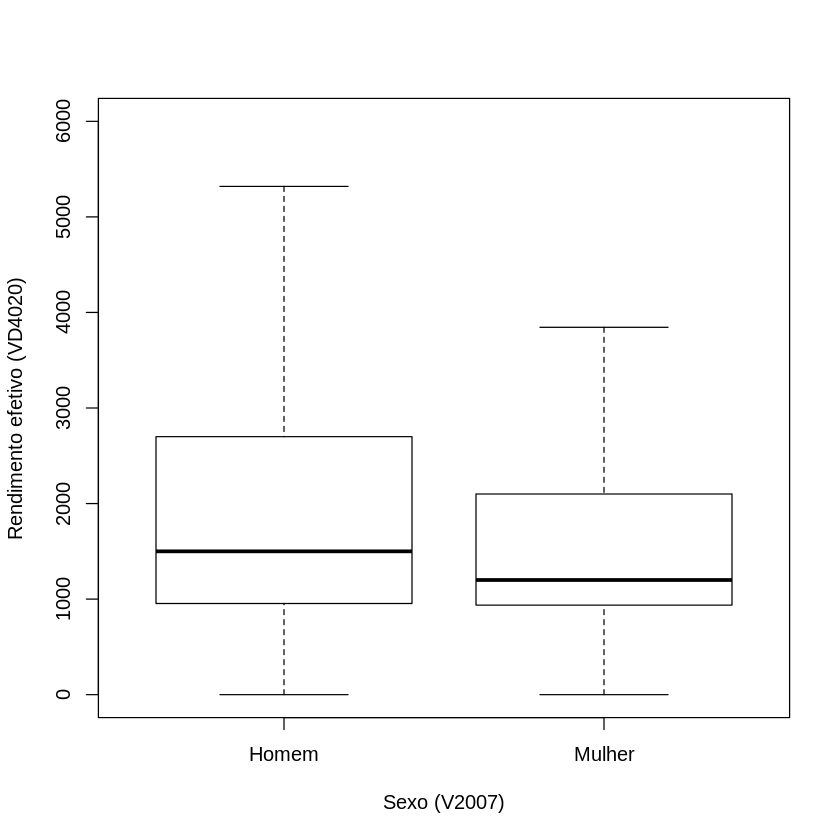

In [ ]:
svyboxplot(
  formula = VD4020~V2007,
  design = dados_pnadc,
  all.outliers = FALSE,
  main = "",
  xlab = "Sexo (V2007)",
  ylab = "Rendimento efetivo (VD4020)",
  ylim = c(0,6000)
)

In [ ]:
svytotal(x = ~VD4001, design = dados_pnadc, na.rm = TRUE)

                                            total     SE
VD4001Pessoas na força de trabalho      104750978 160365
VD4001Pessoas fora da força de trabalho  61157756 160365

In [ ]:
svymean(x = ~V2007, design = dados_pnadc, na.rm = TRUE)

               mean SE
V2007Homem  0.48912  0
V2007Mulher 0.51088  0

In [ ]:
df_sexo_idade = data.frame(svytable(
  formula = ~V2009+V2007,
  design = dados_pnadc
))



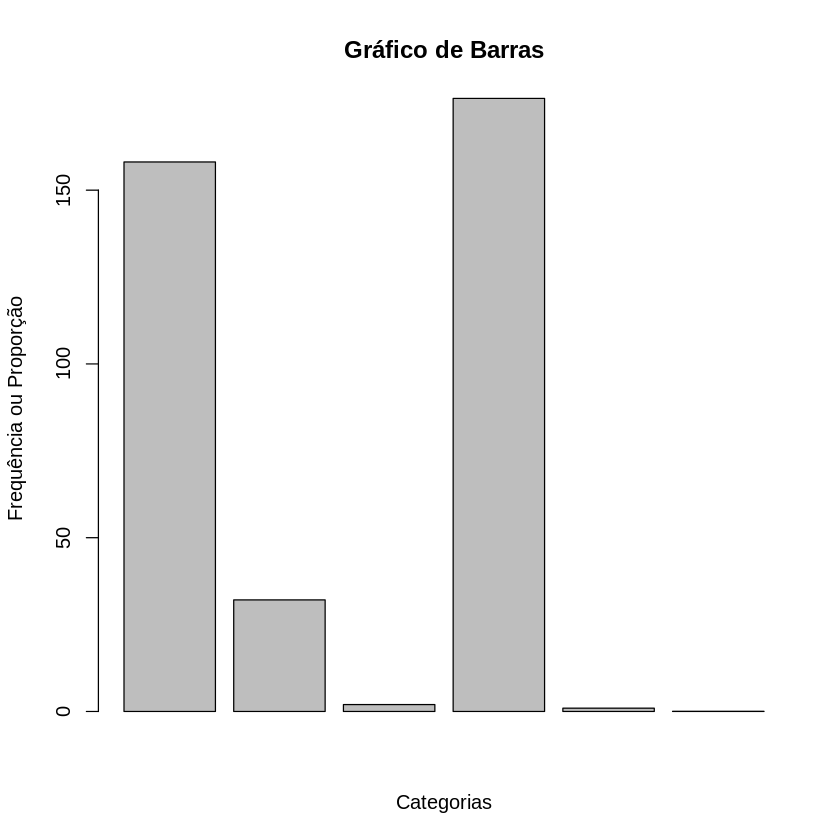

In [ ]:
barplot(as.vector(cor_ou_raca), main = "Gráfico de Barras", xlab = "Categorias", ylab = "Frequência ou Proporção")

In [ ]:
subset(dados_pnadc, V2007 == "Homem")

Call: subset(dados_pnadc, V2007 == "Homem")
Survey bootstrap with 200 replicates and MSE variances.

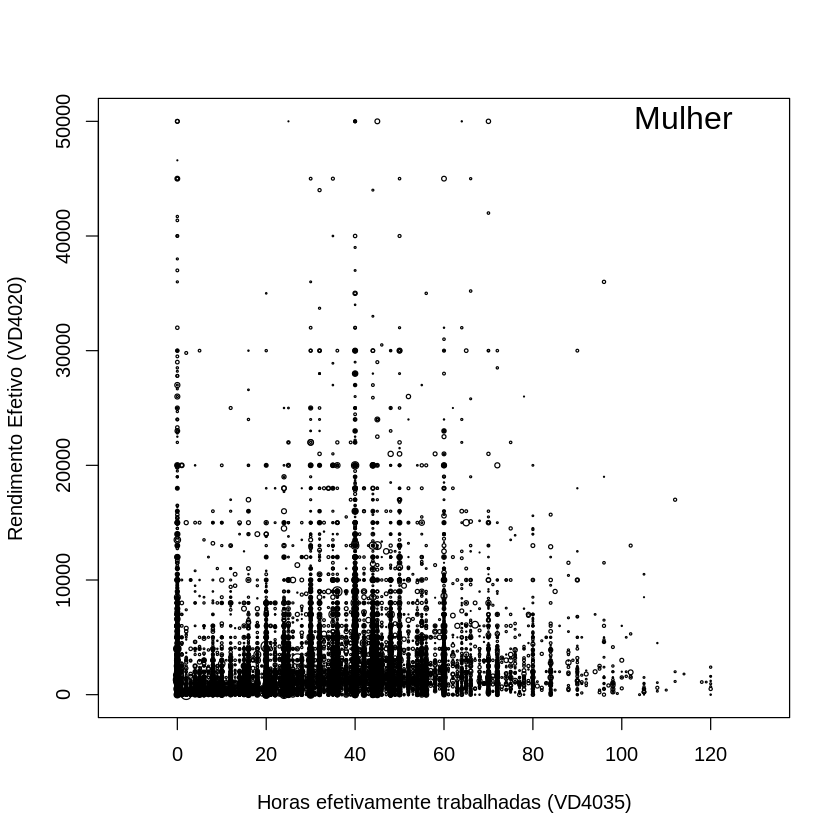

In [ ]:
svyplot(
  formula=VD4020~VD4035,
  design=subset(dados_pnadc, V2007 == "Mulher"),
  style="bubble",
  xlab="Horas efetivamente trabalhadas (VD4035)",
  ylab="Rendimento Efetivo (VD4020)",
  ylim = c(0,50000),
  col = "#FF5733")

text(x = 100, y = 50000, labels = "Mulher", pos = 4, cex = 1.6, col = "black")
#abline(h = 50000, lty = 2, col = "blue")

In [ ]:
taxa_desocupacao = svyratio(
  numerator = ~(VD4002 == "Pessoas desocupadas"),
  denominator = ~(VD4001 == "Pessoas na força de trabalho"),
  design = dados_pnadc,
  na.rm = TRUE)

In [ ]:
taxa_desocupacao

Ratio estimator: svyratio.svyrep.design(numerator = ~(VD4002 == "Pessoas desocupadas"), 
    denominator = ~(VD4001 == "Pessoas na força de trabalho"), 
    design = dados_pnadc, na.rm = TRUE)
Ratios=
                                VD4001 == "Pessoas na força de trabalho"
VD4002 == "Pessoas desocupadas"                                0.1324301
SEs=
            [,1]
[1,] 0.001179026

In [ ]:
cv(object = taxa_desocupacao)

,"VD4001 == ""Pessoas na força de trabalho"""
"VD4002 == ""Pessoas desocupadas""",0.008903003


## **Indicadores do Mercado de Trabalho**

In [ ]:
install.packages("expss")
library(expss)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘htmlwidgets’, ‘maditr’, ‘htmlTable’, ‘matrixStats’


Loading required package: maditr


To select rows from data: rows(mtcars, am==0)



Attaching package: ‘maditr’


The following objects are masked from ‘package:dplyr’:

    between, coalesce, first, last


The following object is masked from ‘package:purrr’:

    transpose


The following object is masked from ‘package:readr’:

    cols


The following object is masked from ‘package:base’:

    sort_by



Use 'expss_output_rnotebook()' to display tables inside R Notebooks.
 To return to the console output, use 'expss_output_default()'.



Attaching package: ‘expss’


The following objects are masked from ‘package:stringr’:

    fixed, regex


The following objects are masked from ‘package:dplyr’:

    compute, contains, na_if, recode, vars, where


The following objects are masked from ‘package:purrr’:

 

In [ ]:
indicadores_mt = dados_pnadc$variables %>%
 tab_cells(UF) %>%
 tab_cols(VD4002, VD4003, VD4004A, VD4005) %>%
 tab_weight(weight = V1028) %>%
 tab_stat_cases(total_statistic = "w_cases",
 total_label = "Total") %>%
 tab_pivot()

df1 = as.data.frame(indicadores_mt[1:14,])
df2 = as.data.frame(indicadores_mt[15:27,])
indicadores_mt = rbind.data.frame(df1, df2)

colnames(indicadores_mt) = c("UF", "ocup", "desocup", "ftp", "fft", "subocup", "desalent")
indicadores_mt =
  indicadores_mt %>%
    mutate(tx_desocup = desocup/(ocup+desocup)*100,
      tx_comb_subocup = (desocup+subocup)/(ocup+desocup)*100,
      tx_comb_ftp = (desocup+ftp)/(ocup+desocup+ftp)*100,
      tx_comp_subut = (desocup+subocup+ftp)/(ocup+desocup+ftp)*100,
      tx_desal_fta = (desalent)/(ocup+desocup+ftp)*100,
      pc_desal_fft = (desalent)/(fft+ ftp)*100,
      pc_desal_ftp = (desalent)/(ftp)*100)

indicadores_mt =
  indicadores_mt %>%
    select(UF, tx_desocup, tx_comb_subocup, tx_comb_ftp, tx_comp_subut, tx_desal_fta, pc_desal_fft, pc_desal_ftp)

siglas_rg = c(rep("N", 7),rep("NE", 9), rep("SE", 4), rep("S", 3), rep("CO", 4))
siglas_uf = c("RO", "AC", "AM", "RR", "PA", "AP", "TO", "MA", "PI", "CE", "RN", "PB", "PE", "AL", "SE", "BA", "MG", "ES", "RJ", "SP", "PR", "SC", "RS", "MS", "MT", "GO", "DF")
indicadores_mt$UF = siglas_uf
indicadores_mt$rg = siglas_rg
indicadores_mt

,UF,tx_desocup,tx_comb_subocup,tx_comb_ftp,tx_comp_subut,tx_desal_fta,pc_desal_fft,pc_desal_ftp,rg
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,RO,10.562150,14.83572,13.885932,18.00069,2.2749963,4.078903,61.21664,N
2,AC,14.631468,20.74318,25.239854,30.59209,7.5466301,11.882124,60.72976,N
3,AM,14.007380,19.35905,21.917008,26.77643,5.1532439,9.265327,56.02551,N
4,RR,10.504836,15.00015,19.159044,23.21966,5.6709404,10.733382,58.64450,N
5,PA,12.281720,22.32309,24.077665,32.76872,7.2392301,12.269477,53.83315,N
6,AP,21.704703,25.96543,27.989765,31.90847,4.2429378,7.508425,52.85581,N
7,TO,11.048851,16.11585,18.198781,22.85849,4.7804005,7.603282,59.47221,N
8,MA,15.774816,24.80308,30.190994,37.67396,13.3139967,17.052405,77.78579,NE
9,PI,13.329969,28.63192,27.046432,39.92669,11.1494377,16.181235,70.44980,NE


In [ ]:
(df_plot = indicadores_mt %>%
  select(UF,rg , tx_desocup) %>%
  mutate(rg = factor(rg, levels = c("N", "NE", "CO", "S", "SE"))) %>%
  arrange(rg, UF) %>%
  mutate(UF = factor(UF, levels = UF)))

UF,rg,tx_desocup
<fct>,<fct>,<dbl>
AC,N,14.631468
AM,N,14.007380
AP,N,21.704703
PA,N,12.281720
RO,N,10.562150
RR,N,10.504836
TO,N,11.048851
AL,NE,17.964164
BA,NE,18.095607


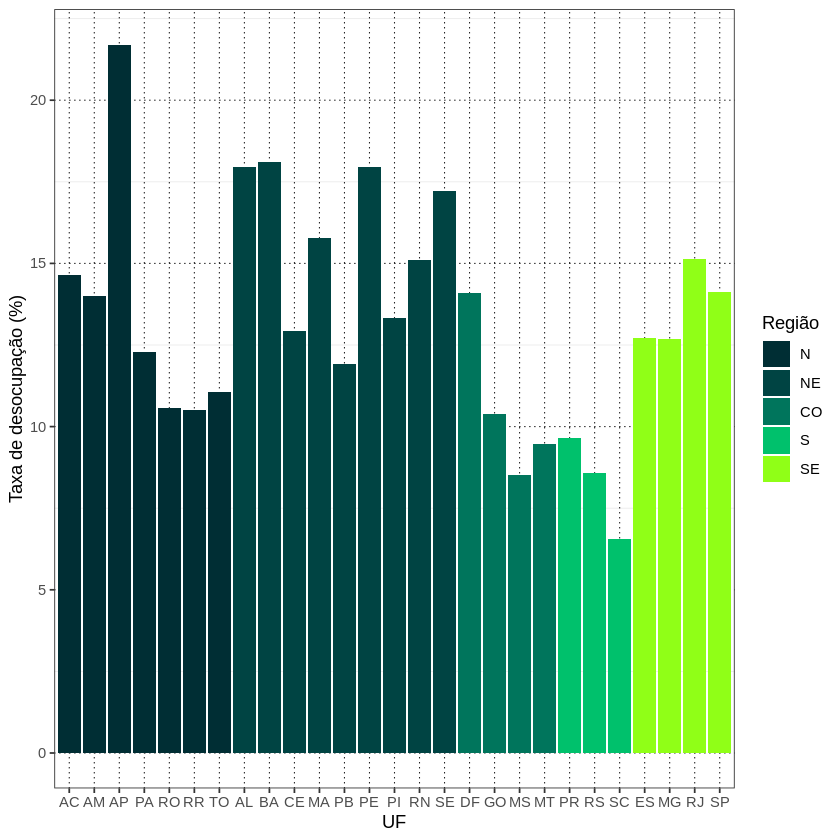

In [ ]:
ggplot(df_plot, aes(x = UF, y = tx_desocup, fill = rg)) +
  geom_bar(stat = "identity") +
  scale_x_discrete(name = "UF") +
  scale_y_continuous(name = "Taxa de desocupação (%)") +
  scale_fill_manual(values = c("N" = "#002e34","NE" = "#004443", "CO" = "#00755c", "S" = "#00c16c", "SE" = "#90ff17"), name = "Região") +
  theme_bw() +
  theme(panel.grid.major = element_line(colour = "black", linewidth = 0.3, linetype = 3))

In [ ]:
write.csv(indicadores_mt, "indicadores.csv", row.names = FALSE)

## **Estatísticas**

In [ ]:
install.packages('convey')
library(convey)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
giniUF = svyby(formula=~VD4020, by=~UF, design=dados_pnadc, FUN=svygini, na.rm=TRUE)

giniUF = data.frame(giniUF) %>%
  mutate(gini = VD4020) %>%
  select(UF, gini)

rownames(giniUF) = NULL

giniUF$UF = siglas_uf = c("RO", "AC", "AM", "RR", "PA", "AP", "TO", "MA", "PI", "CE", "RN", "PB", "PE", "AL", "SE", "BA", "MG", "ES", "RJ", "SP", "PR", "SC", "RS", "MS", "MT", "GO", "DF")

write.csv(giniUF, "gini_uf.csv", row.names = FALSE)

In [ ]:
mean(df$VD4020, na.rm = TRUE)

[1] 2100.851

In [ ]:
totalrenda = svytotal(x=~VD4020, design=dados_pnadc, na.rm=TRUE)

In [ ]:
totalrenda

            total         SE
VD4020 2.0918e+11 2513490843

In [ ]:
svymean(x = ~VD4020, design = dados_pnadc, na.rm = TRUE)

         mean     SE
VD4020 2359.8 27.686

In [ ]:
cv(object = totalrenda)

VD4020 
0.012016

In [ ]:
print(1)

[1] 1


## **Modelagem**

In [ ]:
rg = c(rep("N", 7),rep("NE", 9), rep("SE", 4), rep("S", 3), rep("CO", 4))

uf = dados_pnadc$variables %>%
  select(UF) %>%
  group_by(UF) %>%
  count()

uf$regiao = rg
uf = uf %>%
  select(UF, regiao)

dados_pnadc$variables = dados_pnadc$variables %>%
  left_join(uf, by = 'UF') %>%
  mutate(regiao = factor(regiao, levels = c('SE', 'N', 'NE', 'CO', 'S')))
dados_pnadc$variables$tres_salarios_min = ifelse(dados_pnadc$variables$VD4020>3*954,1,0)
dados_pnadc$variables = dados_pnadc$variables %>%
  mutate(tres_salarios_min = factor(tres_salarios_min, levels = c(0,1)))
dados_pnadc$variables$raca = ifelse(dados_pnadc$variables$V2010 == 'Branca' | dados_pnadc$variables$V2010 == 'Amarela','Branca ou Amarela','Não Branca ou Amarela')
dados_pnadc$variables = dados_pnadc$variables %>%
  mutate(raca = factor(raca, levels = c('Branca ou Amarela','Não Branca ou Amarela')))
dados_pnadc$variables$superior = ifelse(is.na(dados_pnadc$variables$VD3004), NA, ifelse(dados_pnadc$variables$VD3004 == 'Superior completo', 'Superior completo', 'Não tem superior completo'))
dados_pnadc$variables = dados_pnadc$variables %>%
  mutate(superior = factor(superior, levels = c('Superior completo','Não tem superior completo')))

In [ ]:
modelo_log = svyglm(tres_salarios_min ~ regiao + V2007 + V2009 + raca + superior, dados_pnadc, family = 'binomial')

Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”


In [ ]:
summary(modelo_log)


Call:
svyglm(formula = tres_salarios_min ~ regiao + V2007 + V2009 + 
    raca, dados_pnadc, family = "binomial")

Survey design:
svrepdesign.default(data = data_pnadc, weight = ~V1028, type = "bootstrap", 
    repweights = "V1028[0-9]+", mse = TRUE, replicates = length(sprintf("V1028%03d", 
        seq(1:200))), df = length(sprintf("V1028%03d", seq(1:200))))

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -1.5000880  0.0418576 -35.838  < 2e-16 ***
regiaoN                   -0.3507608  0.0498097  -7.042 3.29e-11 ***
regiaoNE                  -0.6157474  0.0405528 -15.184  < 2e-16 ***
regiaoCO                   0.2303929  0.0403750   5.706 4.32e-08 ***
regiaoS                   -0.0793596  0.0347287  -2.285   0.0234 *  
V2007Mulher               -0.4048278  0.0147517 -27.443  < 2e-16 ***
V2009                      0.0226464  0.0006345  35.690  < 2e-16 ***
racaNão Branca ou Amarela -0.8714754  0.0219539 -39.696  < 2e-16 ***
--

In [ ]:
summary(modelo_log)


Call:
svyglm(formula = tres_salarios_min ~ regiao + V2007 + V2009 + 
    raca + superior, dados_pnadc, family = "binomial")

Survey design:
svrepdesign.default(data = data_pnadc, weight = ~V1028, type = "bootstrap", 
    repweights = "V1028[0-9]+", mse = TRUE, replicates = length(sprintf("V1028%03d", 
        seq(1:200))), df = length(sprintf("V1028%03d", seq(1:200))))

Coefficients:
                                    Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                        0.1209870  0.0477818    2.532 0.012144 *  
regiaoN                           -0.3796156  0.0451866   -8.401 9.94e-15 ***
regiaoNE                          -0.6355964  0.0347876  -18.271  < 2e-16 ***
regiaoCO                           0.2273371  0.0363853    6.248 2.64e-09 ***
regiaoS                            0.1075322  0.0302470    3.555 0.000476 ***
V2007Mulher                       -0.8874285  0.0175249  -50.638  < 2e-16 ***
V2009                              0.0263123  0.0007362   35.741  

In [ ]:
library(broom)
tidy(modelo_log, expo = TRUE, conf.int = TRUE)

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1.12861028,0.0477817945,2.532074,1.214417e-02,1.02709996,1.24015306
regiaoN,0.68412437,0.0451866035,-8.401064,9.936174e-15,0.62578751,0.74789948
regiaoNE,0.52961951,0.0347876218,-18.270764,8.618989e-44,0.49449725,0.56723638
regiaoCO,1.25525297,0.0363852711,6.248053,2.644923e-09,1.16832203,1.34865215
regiaoS,1.11352676,0.0302469861,3.555139,4.762108e-04,1.04903554,1.18198268
V2007Mulher,0.41171313,0.0175248814,-50.638200,1.202097e-112,0.39772454,0.42619372
V2009,1.02666156,0.0007362049,35.740504,1.571406e-86,1.02517179,1.02815349
racaNão Branca ou Amarela,0.60366059,0.0207018747,-24.381520,1.496413e-60,0.57950741,0.62882045
superiorNão tem superior completo,0.08184089,0.0241226535,-103.760486,6.484306e-170,0.07803801,0.08582909


In [ ]:
media_ocupacao = svymean(~interaction(tres_salarios_min,regiao=='SE'), subset(dados_pnadc, regiao=='SE'), na.rm = T)
ftable(media_ocupacao)

                                                               A           B
interaction(tres_salarios_min, regiao == "SE")0.TRUE 0.754949446 0.004936321
interaction(tres_salarios_min, regiao == "SE")1.TRUE 0.245050554 0.004936321

In [ ]:
media_ocupacao = svymean(~interaction(tres_salarios_min,regiao=='CO'), subset(dados_pnadc, regiao=='CO'), na.rm = T)
ftable(media_ocupacao)

                                                               A           B
interaction(tres_salarios_min, regiao == "CO")0.TRUE 0.740100264 0.005922897
interaction(tres_salarios_min, regiao == "CO")1.TRUE 0.259899736 0.005922897

In [ ]:
media_ocupacao = svymean(~interaction(tres_salarios_min,regiao=='N'), subset(dados_pnadc, regiao=='N'), na.rm = T)
ftable(media_ocupacao)

                                                              A           B
interaction(tres_salarios_min, regiao == "N")0.TRUE 0.852379854 0.005207218
interaction(tres_salarios_min, regiao == "N")1.TRUE 0.147620146 0.005207218

In [ ]:
media_ocupacao = svymean(~interaction(VD4002,regiao=='NE'), subset(dados_pnadc, regiao=='NE'), na.rm = T)
ftable(media_ocupacao)

                                                                      A
interaction(VD4002, regiao == "NE")Pessoas ocupadas.TRUE    0.839553900
interaction(VD4002, regiao == "NE")Pessoas desocupadas.TRUE 0.160446100
                                                                      B
interaction(VD4002, regiao == "NE")Pessoas ocupadas.TRUE    0.002343864
interaction(VD4002, regiao == "NE")Pessoas desocupadas.TRUE 0.002343864

In [ ]:
media_ocupacao = svymean(~interaction(VD4002,regiao=='CO'), subset(dados_pnadc, regiao=='CO'), na.rm = T)
ftable(media_ocupacao)

                                                                      A
interaction(VD4002, regiao == "CO")Pessoas ocupadas.TRUE    0.894140056
interaction(VD4002, regiao == "CO")Pessoas desocupadas.TRUE 0.105859944
                                                                      B
interaction(VD4002, regiao == "CO")Pessoas ocupadas.TRUE    0.002834396
interaction(VD4002, regiao == "CO")Pessoas desocupadas.TRUE 0.002834396

In [ ]:
regTermTest(modelo_log, ~ raca)

Wald test for raca
 in svyglm(formula = tres_salarios_min ~ regiao + V2007 + V2009 + 
    raca, dados_pnadc, family = "binomial")
F =  1575.755  on  1  and  192  df: p= < 2.22e-16 

In [ ]:
install.packages('pROC')
library(pROC)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




In [ ]:
predicted_probs = predict(modelo_log, type = "response")

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC: 0.816286149547423"


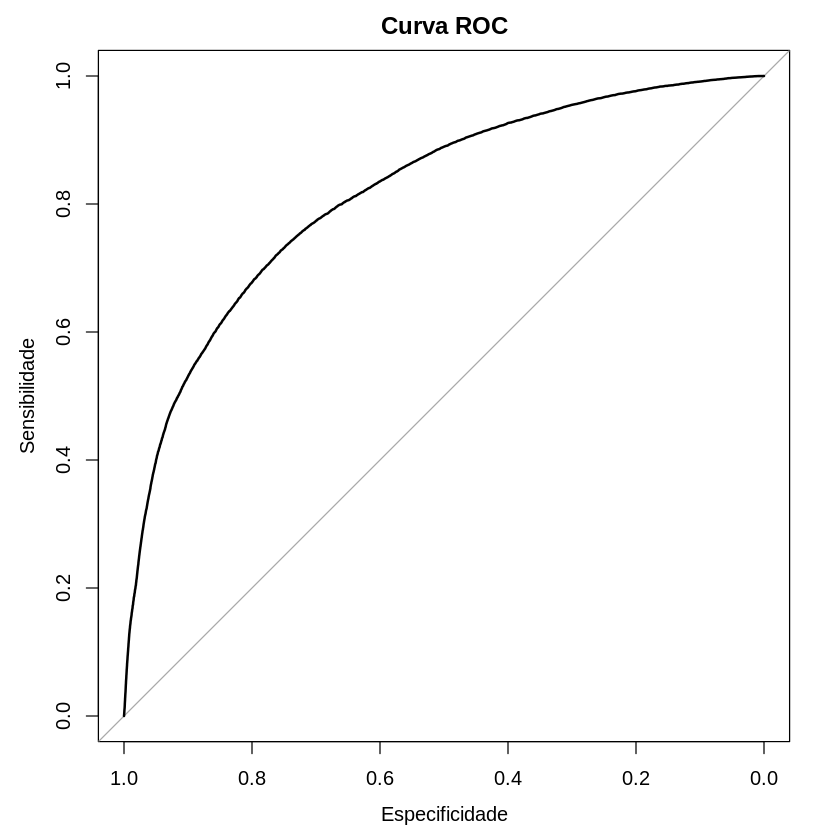

In [ ]:
actual_values = na.omit(dados_pnadc$variables$tres_salarios_min)

# Criação da curva ROC
roc_curve = roc(actual_values, predicted_probs)

# Plot da curva ROC
plot(roc_curve, main = 'Curva ROC', xlab = 'Especificidade', ylab = 'Sensibilidade')

# Cálculo da AUC
auc_value = auc(roc_curve)
print(paste("AUC:", auc_value))

In [ ]:
c(length(predicted_probs),length(na.omit(actual_values)))

[1] 223346 223346